NAMA ANGGOTA:
1.   NAUFAL EL KAMIL ADITYA PRATAMA RAHMAN 2211102012
2.   SALSABILA SEPTI SUKMAYANTI - 2211102006

##Import dan Install

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.5 MB/s eta 0:00:00


In [ ]:
pip install haversine

In [ ]:
# Import Library
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from geopy.distance import geodesic
import geopandas as gpd
import itertools
import contextily as cx
from shapely.geometry import Point, LineString
from haversine import haversine


##Langsung pilih lokasi yaitu BANYUMAS

In [ ]:
# Mengumpulkan informasi geografis tentang Kab banyumas
kabupaten = ox.geocode_to_gdf("Banyumas, Jawa Tengah, Indonesia")

# Menampilkan informasi yang dikumpulkan
print(kabupaten.head())

                                            geometry   bbox_west  bbox_south  \
0  POLYGON ((108.89131 -7.44891, 108.89136 -7.449...  108.891311   -7.663945   

    bbox_east  bbox_north  place_id  osm_type   osm_id       lat         lon  \
0  109.445834   -7.246292  27008493  relation  9686820 -7.455072  109.116746   

      class            type  place_rank  importance addresstype      name  \
0  boundary  administrative          12    0.479602      county  Banyumas   

                              display_name  
0  Banyumas, Central Java, Java, Indonesia  


In [ ]:
kabupaten.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

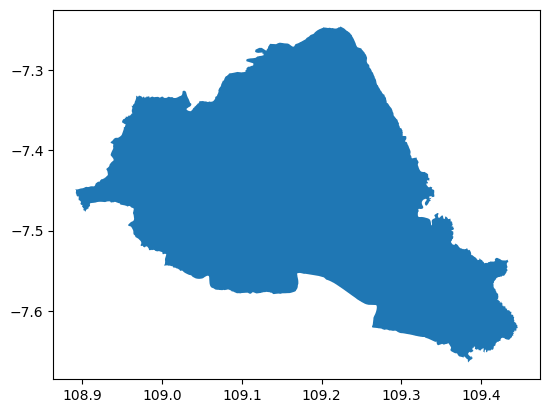

In [ ]:
# Plot data
kabupaten.plot()

##Contoh Mencari Beberapa Kabupaten

In [ ]:
# Mencari dan mendapatkan beberapa tempat sekaligus
List_kabupaten = [
    "Cilacap, Central Java, Indonesia",
    "Purbalingga, Central Java, Indonesia",
    "Banjarnegara, Central Java, Indonesia",
    "Brebes, Central Java, Indonesia",
    "Tegal, Central Java, Indonesia",
    "Banyumas, Central Java, Indonesia"
]

In [ ]:
#Menggunakan function yang sama namun mengganti inputnya menjadi List_City
Beberapa_kabupaten = ox.geocode_to_gdf(List_kabupaten)
Beberapa_kabupaten.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((108.55585 -7.28859, 108.55614 -7.289...",108.555855,-7.784624,109.395500,-7.138725,26937906,relation,9686822,-7.461671,108.804615,boundary,administrative,12,0.478568,county,Cilacap,"Cilacap, Central Java, Java, Indonesia"
1,"POLYGON ((109.22367 -7.24629, 109.22459 -7.246...",109.223671,-7.493500,109.584518,-7.161180,27043148,relation,9686819,-7.327330,109.399899,boundary,administrative,12,0.452167,county,Purbalingga,"Purbalingga, Central Java, Java, Indonesia"
2,"POLYGON ((109.36142 -7.48632, 109.36146 -7.486...",109.361420,-7.540750,109.917725,-7.171164,27036590,relation,9686816,-7.355873,109.660073,boundary,administrative,12,0.462117,county,Banjarnegara,"Banjarnegara, Central Java, Java, Indonesia"
3,"POLYGON ((108.69297 -7.15167, 108.69341 -7.152...",108.692974,-7.351615,109.175492,-6.752419,26920837,relation,9686821,-7.052071,108.888136,boundary,administrative,12,0.466593,county,Brebes,"Brebes, Central Java, Java, Indonesia"
4,"POLYGON ((109.075 -6.8809, 109.07507 -6.88128,...",109.074997,-6.900017,109.161961,-6.839489,28079150,relation,9686828,-6.869811,109.115065,boundary,administrative,12,0.476448,county,Tegal,"Tegal, Central Java, Java, Indonesia"


<Axes: >

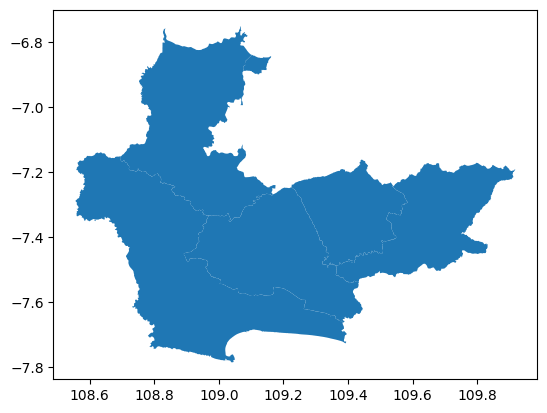

In [ ]:
# Plot peta
Beberapa_kabupaten.plot()

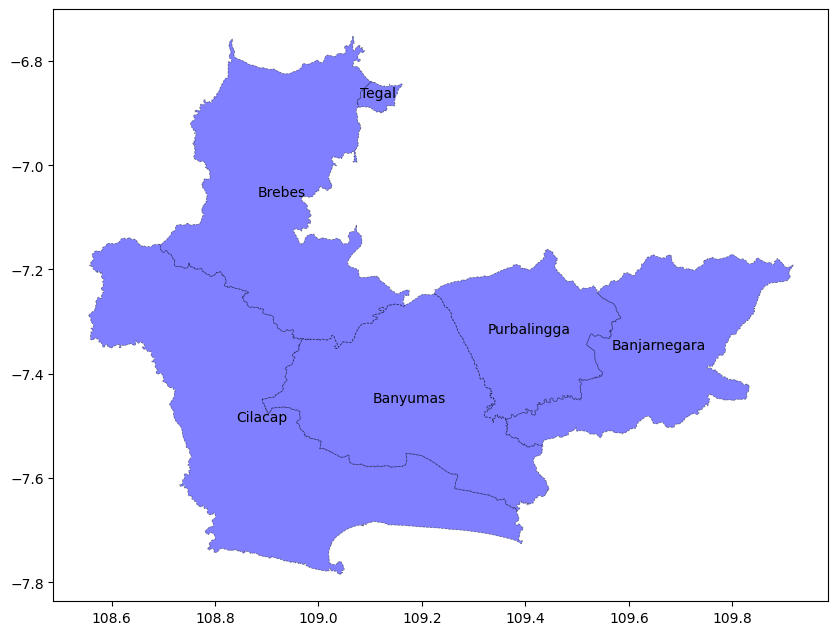

In [ ]:
# Plot peta dan display Label name
fig, ax = plt.subplots(figsize=(10, 10))
Beberapa_kabupaten.plot(ax=ax, color='blue', alpha=0.5, linestyle='--', linewidth=0.5, edgecolor='black')

for idx, row in Beberapa_kabupaten.iterrows():
    plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10, color='black')

plt.show()

##PILIH LOKASI 10 SEKOLAH DI BANYUMAS

<ipython-input-12-b7e3e2196808>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sekolah['lon'] = sekolah.geometry.centroid.x
<ipython-input-12-b7e3e2196808>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sekolah['lat'] = sekolah.geometry.centroid.y
<ipython-input-12-b7e3e2196808>:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


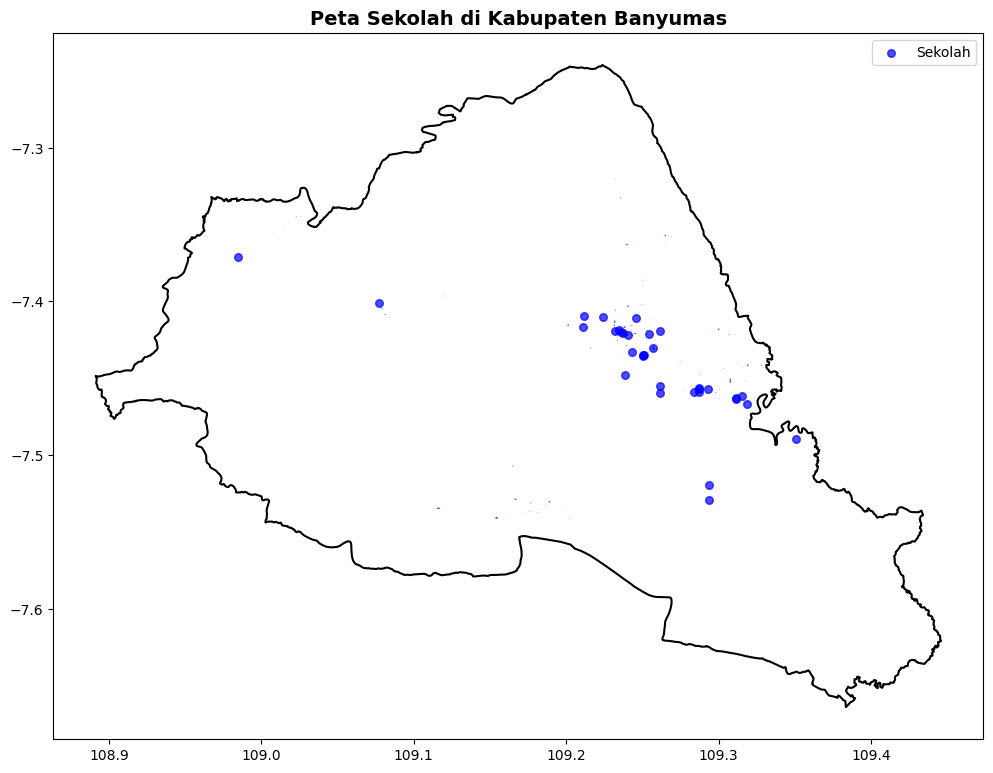

In [ ]:
place_name = "Banyumas, Jawa Tengah, Indonesia"
tag_amenity = {'amenity': 'school'}

kabupaten = ox.geocode_to_gdf(place_name)
sekolah = ox.features_from_place("Banyumas, Indonesia", tags=tag_amenity)

sekolah = sekolah.to_crs(epsg=4326)

# Ambil koordinat sekolah
sekolah['lon'] = sekolah.geometry.centroid.x
sekolah['lat'] = sekolah.geometry.centroid.y

# Buat plot batas Kabupaten dan titik sekolah
fig, ax = plt.subplots(figsize=(12, 10))

# Plot batas Kabupaten Banyumas
kabupaten.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.5, label="Batas Kabupaten Banyumas")

# Plot sekolah
sekolah.plot(ax=ax, marker='o', color='blue', markersize=30, label="Sekolah", alpha=0.7)

# Tambahkan judul dan legenda
ax.set_title("Peta Sekolah di Kabupaten Banyumas", fontsize=14, fontweight='bold')
ax.legend()

plt.show()


In [ ]:
# Mendapatkan bounding box dalam urutan yang benar
west, south, east, north = kabupaten.total_bounds

print(f"North: {north}, South: {south}, East: {east}, West: {west}")

North: -7.2462921, South: -7.6639446, East: 109.4458343, West: 108.8913111


In [ ]:
# Mendefinisikan bounding box untuk wilayah di Banyumas
north, south, east, west = -7.2462921, -7.6639446, 109.4458343, 108.8913111

# Mendapatkan objek bangunan dalam cakupan wilayah tersebut
building_bbox = ox.features.features_from_bbox((west, south, east, north), tags={'building': True})

print(building_bbox.shape)

(822755, 142)


In [ ]:
building_bbox.head()

geometry building           amenity  \
element id                                                                  
node    1448608332  POINT (109.23622 -7.42534)      yes               NaN   
        1887657631  POINT (109.29846 -7.45788)      yes  place_of_worship   
        2006020429  POINT (109.24238 -7.42907)   public               NaN   
        2047440108  POINT (109.01757 -7.34923)   mosque  place_of_worship   
        2817178267  POINT (109.28721 -7.45572)   office               NaN   

                   denomination                               name  \
element id                                                           
node    1448608332          NaN                    Gedhe Institute   
        1887657631          NaN      Klenteng Hok Tek Bio Sokaraja   
        2006020429          NaN    Purwokerto Kulon Community Hall   
        2047440108        sunni                      Masjid Bribis   
        2817178267          NaN  Kantor Kepala Desa Sokaraja Kulon   

                   opening_hours  religion                     addr:housename  \
element id                                                                      
node    1448608332           NaN       NaN                      Wisma Merdeka   
        1887657631           NaN  buddhist                                NaN   
        2006020429           NaN       NaN  Kantor Kelurahan Purwokerto Kulon   
        2047440108          24/7    muslim                                NaN   
        2817178267           NaN       NaN                                NaN   

                   addr:housenumber     addr:street  ...  \
element id                                           ...   
node    1448608332               17   Jalan Merdeka  ...   
        1887657631              NaN             NaN  ...   
        2006020429              NaN  Jalan Situmpur  ...   
        2047440108              NaN             NaN  ...   
        2817178267              NaN             NaN  ...   

                   healthcare:speciality note level police:type_idn architect  \
element id                                                                      
node    1448608332                   NaN  NaN   NaN             NaN       NaN   
        1887657631                   NaN  NaN   NaN             NaN       NaN   
        2006020429                   NaN  NaN   NaN             NaN       NaN   
        2047440108                   NaN  NaN   NaN             NaN       NaN   
        2817178267                   NaN  NaN   NaN             NaN       NaN   

                   grades outdoor_seating industrial house type  
element id                                                       
node    1448608332    NaN             NaN        NaN   NaN  NaN  
        1887657631    NaN             NaN        NaN   NaN  NaN  
        2006020429    NaN             NaN        NaN   NaN  NaN  
        2047440108    NaN             NaN        NaN   NaN  NaN  
        2817178267    NaN             NaN        NaN   NaN  NaN  

[5 rows x 142 columns]

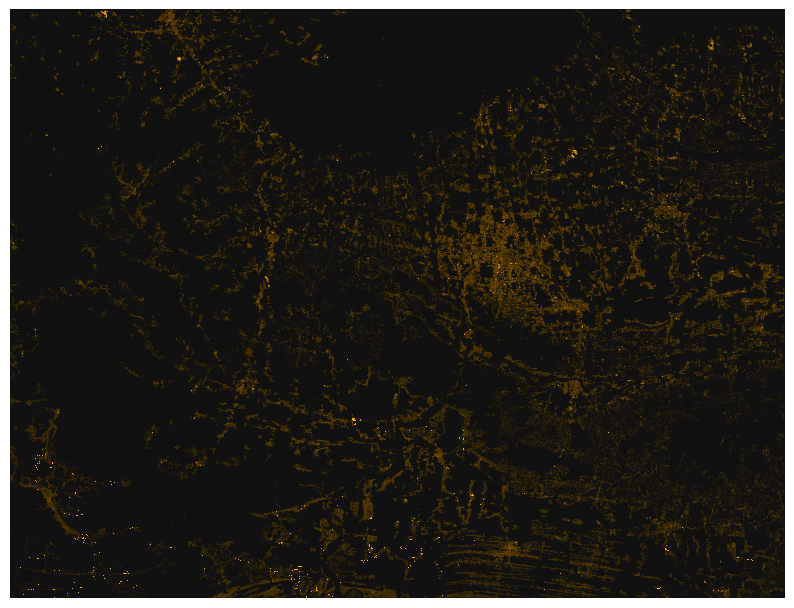

In [ ]:
fix, ax = ox.plot_footprints(building_bbox, figsize=(10,10))

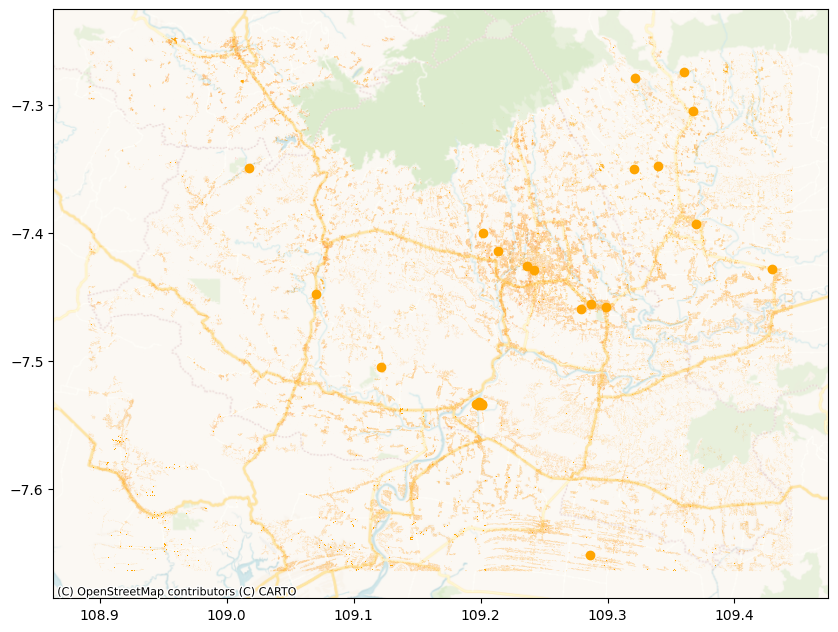

In [ ]:
# setup figure and axis
fig, ax = plt.subplots(1, figsize=(10, 8))

# plot building
building_bbox.plot(
    ax=ax,
    color="orange"
)

# menambahkan basemap
cx.add_basemap(
    ax,
    crs='EPSG:4326',
    source=cx.providers.CartoDB.VoyagerNoLabels
)

plt.show()

In [ ]:
# Data 10 sekolah
sekolah_locations = [
    ("SMA Negeri 1 Purwokerto", 109.2347, -7.4245),
    ("SMA Negeri 2 Purwokerto", 109.2442, -7.4250),
    ("SMA Negeri 3 Purwokerto", 109.2531, -7.4291),
    ("SMK Negeri 1 Purwokerto", 109.2484, -7.4276),
    ("SMK Negeri 2 Purwokerto", 109.2425, -7.4233),
    ("SMP Negeri 1 Purwokerto", 109.2478, -7.4220),
    ("SMP Negeri 2 Purwokerto", 109.2500, -7.4212),
    ("SD Negeri 1 Karanglewas", 109.2395, -7.4301),
    ("SD Negeri 2 Purwokerto", 109.2453, -7.4284),
    ("MI Al-Irsyad Al-Islamiyyah", 109.2439, -7.4267),
]

<ipython-input-19-bdd11ee43cbd>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(sekolah_locations)).colors
<ipython-input-19-bdd11ee43cbd>:6: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf_sekolah["geometry"] = gdf_sekolah.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)


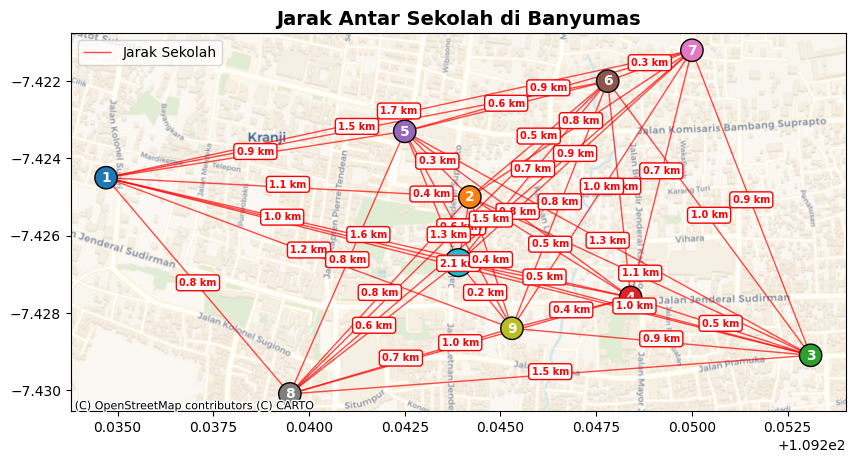

In [ ]:
# Warna untuk setiap titik sekolah
colors = plt.cm.get_cmap("tab10", len(sekolah_locations)).colors

# Konversi ke GeoDataFrame (untuk titik sekolah)
gdf_sekolah = gpd.GeoDataFrame(sekolah_locations, columns=["name", "longitude", "latitude"])
gdf_sekolah["geometry"] = gdf_sekolah.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
gdf_sekolah = gdf_sekolah.set_crs(epsg=4326)

# Buat garis antar semua titik sekolah dengan jarak
lines = []
distances = []
for i in range(len(sekolah_locations)):
    for j in range(i + 1, len(sekolah_locations)):
        point1 = Point(sekolah_locations[i][1], sekolah_locations[i][2])
        point2 = Point(sekolah_locations[j][1], sekolah_locations[j][2])
        lines.append(LineString([point1, point2]))

        # Hitung jarak dalam km
        jarak_km = geodesic((point1.y, point1.x), (point2.y, point2.x)).kilometers
        distances.append((i+1, j+1, jarak_km))

# Konversi ke GeoDataFrame untuk garis
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

# Setup figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot garis penghubung antar sekolah
gdf_lines.plot(ax=ax, color='red', linewidth=1, alpha=0.7, label="Jarak Sekolah")

# Plot titik lokasi sekolah (dengan warna berbeda)
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, c=[colors[i]], s=100, edgecolors="black", zorder=3)
    ax.text(lon, lat, str(i + 1), fontsize=10, ha='center', va='center',
            color='white', fontweight='bold', bbox=dict(facecolor=colors[i], edgecolor='black', boxstyle='circle'))

# Menambahkan label jarak di tengah garis penghubung
for (num1, num2, jarak_km) in distances:
    point1 = sekolah_locations[num1-1]
    point2 = sekolah_locations[num2-1]
    mid_x, mid_y = (point1[1] + point2[1]) / 2, (point1[2] + point2[2]) / 2
    ax.text(mid_x, mid_y, f"{jarak_km:.1f} km", fontsize=7, color="red", ha="center",
            fontweight="bold", bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Tambahkan basemap
cx.add_basemap(ax, crs=gdf_sekolah.crs.to_string(), source=cx.providers.CartoDB.Voyager)

plt.title("Jarak Antar Sekolah di Banyumas", fontsize=14, fontweight="bold")
plt.legend()
plt.show()

In [ ]:
print("\n📍 Daftar Sekolah:")
for i, (name, _, _) in enumerate(sekolah_locations):
    print(f"{i+1}. {name}")

print("\n🔗 Jarak Antar Sekolah:")
for num1, num2, jarak_km in distances:
    print(f"{num1} ↔ {num2}: {jarak_km:.2f} km")


📍 Daftar Sekolah:
1. SMA Negeri 1 Purwokerto
2. SMA Negeri 2 Purwokerto
3. SMA Negeri 3 Purwokerto
4. SMK Negeri 1 Purwokerto
5. SMK Negeri 2 Purwokerto
6. SMP Negeri 1 Purwokerto
7. SMP Negeri 2 Purwokerto
8. SD Negeri 1 Karanglewas
9. SD Negeri 2 Purwokerto
10. MI Al-Irsyad Al-Islamiyyah

🔗 Jarak Antar Sekolah:
1 ↔ 2: 1.05 km
1 ↔ 3: 2.09 km
1 ↔ 4: 1.55 km
1 ↔ 5: 0.87 km
1 ↔ 6: 1.47 km
1 ↔ 7: 1.73 km
1 ↔ 8: 0.82 km
1 ↔ 9: 1.25 km
1 ↔ 10: 1.04 km
2 ↔ 3: 1.08 km
2 ↔ 4: 0.55 km
2 ↔ 5: 0.27 km
2 ↔ 6: 0.52 km
2 ↔ 7: 0.77 km
2 ↔ 8: 0.77 km
2 ↔ 9: 0.40 km
2 ↔ 10: 0.19 km
3 ↔ 4: 0.54 km
3 ↔ 5: 1.33 km
3 ↔ 6: 0.98 km
3 ↔ 7: 0.94 km
3 ↔ 8: 1.51 km
3 ↔ 9: 0.86 km
3 ↔ 10: 1.05 km
4 ↔ 5: 0.81 km
4 ↔ 6: 0.62 km
4 ↔ 7: 0.73 km
4 ↔ 8: 1.02 km
4 ↔ 9: 0.35 km
4 ↔ 10: 0.51 km
5 ↔ 6: 0.60 km
5 ↔ 7: 0.86 km
5 ↔ 8: 0.82 km
5 ↔ 9: 0.64 km
5 ↔ 10: 0.41 km
6 ↔ 7: 0.26 km
6 ↔ 8: 1.28 km
6 ↔ 9: 0.76 km
6 ↔ 10: 0.67 km
7 ↔ 8: 1.52 km
7 ↔ 9: 0.95 km
7 ↔ 10: 0.91 km
8 ↔ 9: 0.67 km
8 ↔ 10: 0.61 km
9 ↔ 10: 0.24 km


##Brute Force

<ipython-input-23-f58294a2920c>:17: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf_points["geometry"] = gdf_points.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)


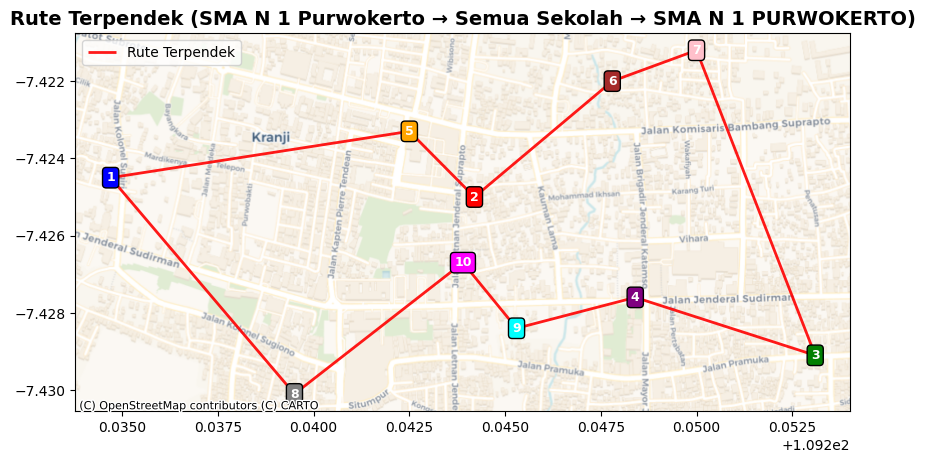


=== RUTE TERPENDEK MULAI DARI SMA N 1 PURWOKERTO ===
1. SMA N 1 Purwokerto → SMK Negeri 2 Purwokerto (0.87 km) → SMA Negeri 2 Purwokerto (0.27 km) → SMP Negeri 1 Purwokerto (0.52 km) → SMP Negeri 2 Purwokerto (0.26 km) → SMA Negeri 3 Purwokerto (0.94 km) → SMK Negeri 1 Purwokerto (0.54 km) → SD Negeri 2 Purwokerto (0.35 km) → MI Al-Irsyad Al-Islamiyyah (0.24 km) → SD Negeri 1 Karanglewas (0.61 km) → SMA N 1 Purwokerto (0.82 km)

Total Jarak Rute Terpendek: 5.42 km


In [ ]:
# Data 10 Sekolah
sekolah_locations = [
    ("SMA Negeri 1 Purwokerto", 109.2347, -7.4245),
    ("SMA Negeri 2 Purwokerto", 109.2442, -7.4250),
    ("SMA Negeri 3 Purwokerto", 109.2531, -7.4291),
    ("SMK Negeri 1 Purwokerto", 109.2484, -7.4276),
    ("SMK Negeri 2 Purwokerto", 109.2425, -7.4233),
    ("SMP Negeri 1 Purwokerto", 109.2478, -7.4220),
    ("SMP Negeri 2 Purwokerto", 109.2500, -7.4212),
    ("SD Negeri 1 Karanglewas", 109.2395, -7.4301),
    ("SD Negeri 2 Purwokerto", 109.2453, -7.4284),
    ("MI Al-Irsyad Al-Islamiyyah", 109.2439, -7.4267),
]

# Konversi ke GeoDataFrame
gdf_points = gpd.GeoDataFrame(sekolah_locations, columns=["name", "longitude", "latitude"])
gdf_points["geometry"] = gdf_points.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
gdf_points = gdf_points.set_crs(epsg=4326)

# Hitung jarak antar sekolah
distances = {}
for i in range(len(sekolah_locations)):
    for j in range(i + 1, len(sekolah_locations)):
        point1 = (sekolah_locations[i][2], sekolah_locations[i][1])
        point2 = (sekolah_locations[j][2], sekolah_locations[j][1])
        jarak_km = geodesic(point1, point2).kilometers
        distances[(i, j)] = jarak_km
        distances[(j, i)] = jarak_km

# Brute Force TSP dengan SMA N 1 PURWOKERTO sebagai titik awal
start_index = 0
remaining_indices = list(range(1, len(sekolah_locations)))

# Fungsi untuk menghitung total jarak rute
def calculate_route_distance(route):
    total_dist = distances[(start_index, route[0])]
    for i in range(len(route) - 1):
        total_dist += distances[(route[i], route[i + 1])]
    total_dist += distances[(route[-1], start_index)]
    return total_dist

# Coba semua kemungkinan rute dengan (N-1)!/2
all_routes = list(itertools.permutations(remaining_indices))
all_routes= all_routes[:len(all_routes) // 2]
best_route = min(all_routes, key=calculate_route_distance)
shortest_distance = calculate_route_distance(best_route)

# Visualisasi Rute Terpendek
fig, ax = plt.subplots(figsize=(10, 8))

# Plot titik sekolah
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
for i, (name, lon, lat) in enumerate(sekolah_locations):
    ax.scatter(lon, lat, color=colors[i], s=100, edgecolors='black', zorder=3)
    ax.text(lon, lat, str(i + 1), fontsize=9, ha='center', va='center', color='white', fontweight='bold',
            bbox=dict(facecolor=colors[i], edgecolor='black', boxstyle='round,pad=0.3'))

# Plot rute terbaik
best_lines = [LineString([Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2]),
                          Point(sekolah_locations[best_route[0]][1], sekolah_locations[best_route[0]][2])])]

for i in range(len(best_route) - 1):
    best_lines.append(LineString([Point(sekolah_locations[best_route[i]][1], sekolah_locations[best_route[i]][2]),
                                  Point(sekolah_locations[best_route[i+1]][1], sekolah_locations[best_route[i+1]][2])]))

best_lines.append(LineString([Point(sekolah_locations[best_route[-1]][1], sekolah_locations[best_route[-1]][2]),
                              Point(sekolah_locations[start_index][1], sekolah_locations[start_index][2])]))

gdf_best_lines = gpd.GeoDataFrame(geometry=best_lines, crs="EPSG:4326")
gdf_best_lines.plot(ax=ax, color='red', linewidth=2, alpha=0.9, label="Rute Terpendek")

# Tambahkan basemap
cx.add_basemap(ax, crs=gdf_points.crs.to_string(), source=cx.providers.CartoDB.Voyager)

# Judul & Legenda
plt.title("Rute Terpendek (SMA N 1 Purwokerto → Semua Sekolah → SMA N 1 PURWOKERTO)", fontsize=14, fontweight="bold")
plt.legend()
plt.show()

# Cetak Informasi Rute & Jarak
print("\n=== RUTE TERPENDEK MULAI DARI SMA N 1 PURWOKERTO ===")
total_distance = 0
print(f"1. SMA N 1 Purwokerto", end=" ")

for i in range(len(best_route)):
    sekolah1 = sekolah_locations[best_route[i-1] if i > 0 else start_index][0]
    sekolah2 = sekolah_locations[best_route[i]][0]
    jarak = distances[(best_route[i-1] if i > 0 else start_index, best_route[i])]
    total_distance += jarak
    print(f"→ {sekolah2} ({jarak:.2f} km)", end=" ")

# Kembali ke SMA N 1
sekolah_akhir = sekolah_locations[best_route[-1]][0]
jarak_kembali = distances[(best_route[-1], start_index)]
total_distance += jarak_kembali
print(f"→ SMA N 1 Purwokerto ({jarak_kembali:.2f} km)")
print(f"\nTotal Jarak Rute Terpendek: {total_distance:.2f} km")
